In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
import pylab as plt
%matplotlib inline
import seaborn as sns

# Getting to know the data

In [2]:
data = pd.read_csv('telecom_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Handling missing values. We see that there is no missing values:

In [5]:
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [18]:
data.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.00000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,802.367457,873.793128,1227.144399,1224.883998,1224.98069,1221.897487,0.690473,0.592219,1.574329,64.761692,3257.794122
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,535.285103,556.399273,589.350076,603.811142,571.96941,572.039226,0.833755,0.491457,1.068104,30.090047,1888.693496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,392.000000,452.500000,784.500000,746.500000,810.00000,795.500000,0.000000,0.000000,1.000000,35.500000,1609.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,720.000000,784.000000,1327.000000,1356.000000,1328.00000,1324.000000,0.000000,1.000000,2.000000,70.350000,3249.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,1163.500000,1272.500000,1666.000000,1625.500000,1660.50000,1655.000000,1.000000,1.000000,2.000000,89.850000,4901.500000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2022.000000,2087.000000,2236.000000,2279.000000,2183.00000,2187.000000,2.000000,1.000000,3.000000,118.750000,6530.000000


Let's see how many customers churned:

In [6]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

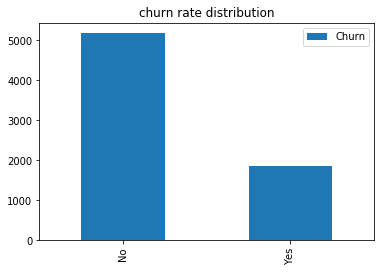

In [7]:
data['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('churn rate distribution');

let's look at the distribution of numeric features

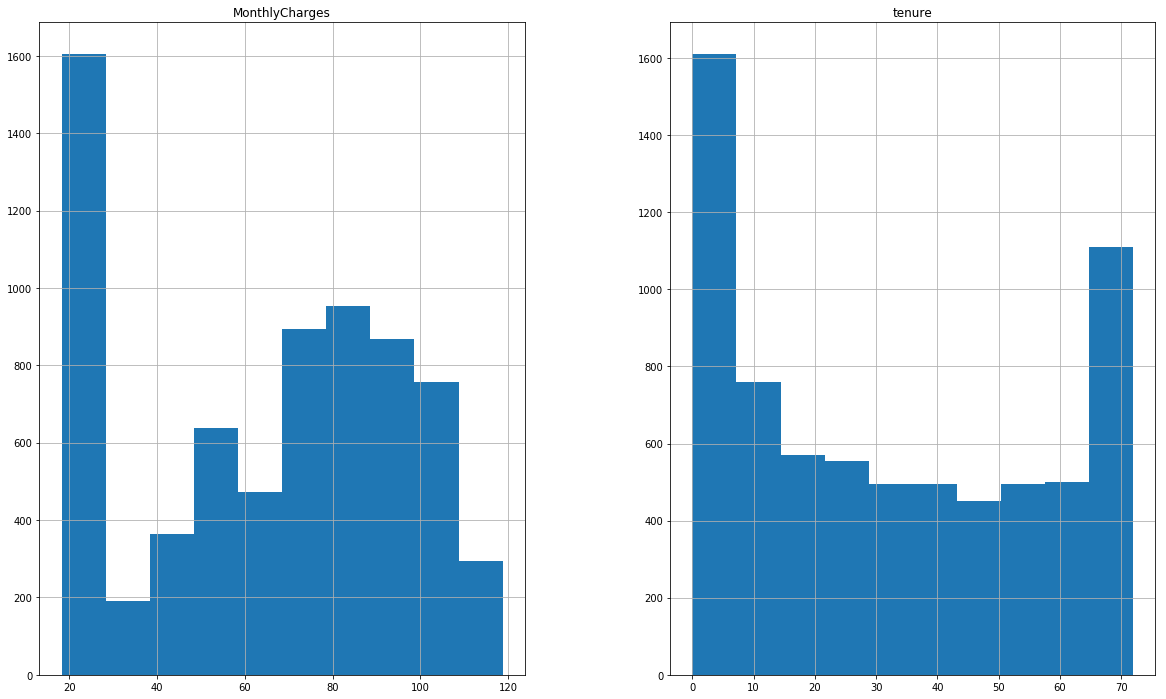

In [8]:

features = list( set(['tenure','MonthlyCharges']))

data[features].hist(figsize=(20,12));

Let's plot pair graphs

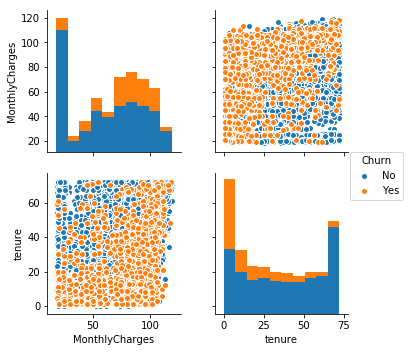

In [9]:
sns.pairplot(data[features + ['Churn']], hue='Churn')

Let's also plot boxplots, describing distribution of numerical features between loyal and churned customers

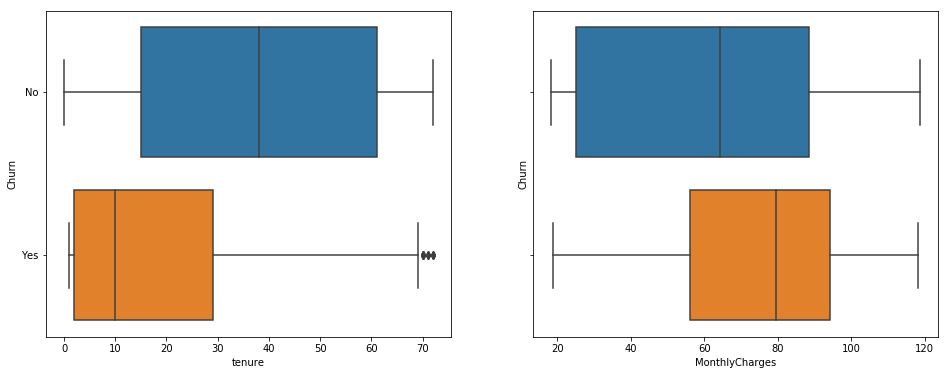

In [10]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
sns.boxplot(x="tenure", y="Churn", data=data,ax = axes[0])
sns.boxplot(x="MonthlyCharges", y="Churn", data=data, ax = axes[1])

From the voilin plots we can see that on average the tenure for churned customers is significantly less than for loyal customers (which is understandable). 

the Monthly charges is for loyal and not loyal customers is similar. 

Overall we can see from the graphs that tenure is very stong feature in reltionship to Churn. It should have significant impact on prediction

# Using Random Forest


We are moving to prediction of Churn rate. as a metric we will use 'ROC_AUC' for binary classification. 
We are going to test tree ensembles for the task: Random Forest and LightGbM

In [11]:
#put the feature into binary format
d = {'No' : False, 'Yes' : True}
data['Churn'] = data['Churn'].map(d)
data['Partner'] = data['Partner'].map(d)
data['Dependents'] = data['Dependents'].map(d)
data['PhoneService'] = data['PhoneService'].map(d)
data['OnlineSecurity'] = data['OnlineSecurity'].map(d)
data['OnlineBackup'] = data['OnlineBackup'].map(d)
data['DeviceProtection'] = data['DeviceProtection'].map(d)
data['TechSupport'] = data['TechSupport'].map(d)
data['StreamingTV'] = data['StreamingTV'].map(d)
data['StreamingMovies'] = data['StreamingMovies'].map(d)
data['PaperlessBilling'] = data['PaperlessBilling'].map(d)
# establish target feature
y = data['Churn']
data = data.drop(['Churn'], axis=1)

Let's use label encoder and random forest alrgorithm to get baseline

In [12]:
from sklearn.svm import SVC
from sklearn.cross_validation import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, StratifiedKFold
##use label encoding for categorical features
cat_features = list(data.drop(data[features], axis = 1).columns.values)
enc = preprocessing.LabelEncoder()
for column in cat_features:
    data[column] = enc.fit_transform(data[column])
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2,shuffle = True,random_state=1)
rf = RandomForestClassifier( random_state=1,class_weight='balanced')
#let's pick a parameters set:
parameters = {'n_estimators': [100,400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7,8,10,15,20],
    'criterion' :['gini', 'entropy']}


C:\Users\MIKBU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\MIKBU\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


Let's make a stratified K-fold for K-Fold cross validation 

In [13]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

rf_grid_search = GridSearchCV(rf,parameters,n_jobs =-1,scoring = 'roc_auc',cv=skf,verbose=True)

rf_grid_search = rf_grid_search.fit(X_train, y_train)
print(rf_grid_search.best_score_)



Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 13.3min finished


0.840875973584


In [14]:
print(rf_grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}


In [15]:
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(n_estimators=400,random_state=1,class_weight='balanced',criterion= 'entropy',max_depth= 8, max_features='auto')
model.fit(X_train, y_train)
preds = model.predict(X_test)
score = roc_auc_score(y_test, preds)
print(score)

0.771060157951


The results of Random forest show us good fit and generalization

# Using LightGBM

In [19]:
import lightgbm as lgb

lgb_params = {}
lgb_params['boosting type'] = 'gbdt'
lgb_params['max_depth'] = -1
lgb_params['objective'] = 'binary'
lgb_params['nthread'] = 5
lgb_params['num_leaves']= 64
lgb_params['learning_rate'] = 0.02
lgb_params['max_bin'] = 512
lgb_params['subsample_for_bin'] = 200
lgb_params['subsample'] = 0.8
lgb_params['subsample_freq'] = 10
lgb_params['colsample_bytree'] = 0.8
lgb_params['reg_alpha'] = 5
lgb_params['reg_lamba'] = 10
lgb_params['min_split_gain'] = 0.5
lgb_params['min_child_weight'] = 1
lgb_params['min_child_samples'] = 5
lgb_params['random_state'] = 1
lgb_params['scale_pos_weight'] = 1
lgb_params['num_class'] = 1

lgb_params['metric'] = 'binary_error'



run lightgbm algorithm with default parameters to establish base result

In [25]:
lgb_model = LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = 5, # Updated from 'nthread' 
          silent = True,
          max_depth = lgb_params['max_depth'],
          max_bin = lgb_params['max_bin'], 
          subsample_for_bin = lgb_params['subsample_for_bin'],
          subsample = lgb_params['subsample'], 
          subsample_freq = lgb_params['subsample_freq'], 
          min_split_gain = lgb_params['min_split_gain'], 
          min_child_weight = lgb_params['min_child_weight'], 
          min_child_samples = lgb_params['min_child_samples'], 
          scale_pos_weight = lgb_params['scale_pos_weight'])
lgb_model.fit(X_train, y_train)
preds = model.predict(X_test)
score = roc_auc_score(y_test, preds)
print(score)

0.771060157951


# Parameters Tuning

Let's create a grid and use it

In [29]:
gridParams = {
    'learning_rate': [0.005],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [1], 
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

In [31]:
grid = GridSearchCV(lgb_model, gridParams, verbose=0, cv=4, n_jobs=2)
grid.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_bin=512, max_depth=-1, min_child_samples=5,
        min_child_weight=1, min_split_gain=0.5, n_estimators=100, n_jobs=5,
        num_leaves=31, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=1, silent=True,
        subsample=0.8, subsample_for_bin=200, subsample_freq=10),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'learning_rate': [0.005], 'n_estimators': [8, 16, 24], 'num_leaves': [6, 8, 12, 16], 'boosting_type': ['gbdt'], 'objective': ['binary'], 'random_state': [1], 'colsample_bytree': [0.64, 0.65, 0.66], 'subsample': [0.7, 0.75], 'reg_alpha': [1, 1.2], 'reg_lambda': [1, 1.2, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Printing the best parameters and best result

In [32]:
print(grid.best_params_)
print(grid.best_score_)


{'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.005, 'n_estimators': 24, 'num_leaves': 16, 'objective': 'binary', 'random_state': 1, 'reg_alpha': 1, 'reg_lambda': 1.4, 'subsample': 0.75}
0.792332268371


Replace LGB parameters with best ones

In [33]:
lgb_params['n_estimators'] = grid.best_params_['n_estimators']
lgb_params['colsample_bytree'] = grid.best_params_['colsample_bytree']
lgb_params['learning_rate'] = grid.best_params_['learning_rate'] 
# params['max_bin'] = grid.best_params_['max_bin']
lgb_params['num_leaves'] = grid.best_params_['num_leaves']
lgb_params['reg_alpha'] = grid.best_params_['reg_alpha']
lgb_params['reg_lambda'] = grid.best_params_['reg_lambda']
lgb_params['subsample'] = grid.best_params_['subsample']

In [ ]:
# Kit k models with early-stopping on different training/validation splits
k = 12;
predsValid = 0 
predsTrain = 0
predsTest = 0
for i in range(0, k): 
    print('Fitting model', k)
    
    # Prepare the data set for fold
    trainData, validData = train_test_split(train, test_size=0.4, stratify=train.Survived)
    trainDataL, trainLabels, trainIDs, trainData = prepLGB(trainData, 
                                                     classCol = 'Survived', 
                                                     IDCol = 'PassengerId',
                                                     fDrop = fDrop)
    validDataL, validLabels, validIDs, validData = prepLGB(validData, 
                                                     classCol = 'Survived', 
                                                     IDCol = 'PassengerId',
                                                     fDrop = fDrop)
    # Train     
    gbm = lgb.train(params, 
                    trainDataL, 
                    100000, 
                    valid_sets=[trainDataL, validDataL],
                    early_stopping_rounds = 50,
                    verbose_eval=4)

    # Plot importance
    lgb.plot_importance(gbm)
    plt.show()
    
    # Predict
    predsValid += gbm.predict(validData, num_iteration=gbm.best_iteration)/k
    predsTrain += gbm.predict(trainData, num_iteration=gbm.best_iteration)/k
    predsTest += gbm.predict(testData, num_iteration=gbm.best_iteration)/k

# Print assessment
# assessMod(predsTrain, trainLabels, predsValid=predsValid, yValid= validLabels, 
#           report=True, plot=True)               